In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import torch
import pickle


In [2]:
def plot(values, name, ax, color=None):
    arr = np.vstack(values)
    length = arr.shape[1]
    mean = arr.mean(axis=0)
    std = arr.std(axis=0)
    if color:
        ax.plot(arr.mean(axis=0), label=name, color=color)
        ax.fill_between(np.arange(length), (mean - std), (mean + std), alpha=0.2, color=color)
    else:
        ax.plot(arr.mean(axis=0), label=name)
        ax.fill_between(np.arange(length), (mean - std),
                        (mean + std), alpha=0.2)


In [3]:
def load_pickle_file(name, m, n, d):
    with open(f'..{os.sep}..{os.sep}results{os.sep}nnz_vectors{os.sep}m-{m}-n-{n}-d-{d}-{name}.pickle', 'rb') as f:
        return pickle.load(f)


/tmp/ipykernel_929385/2538463336.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(['-1', '0', '5', '10', '15'], fontsize=12)
/tmp/ipykernel_929385/2538463336.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_yticklabels(['1e0', '1e1', '1e2', '1e3'], fontsize=14)


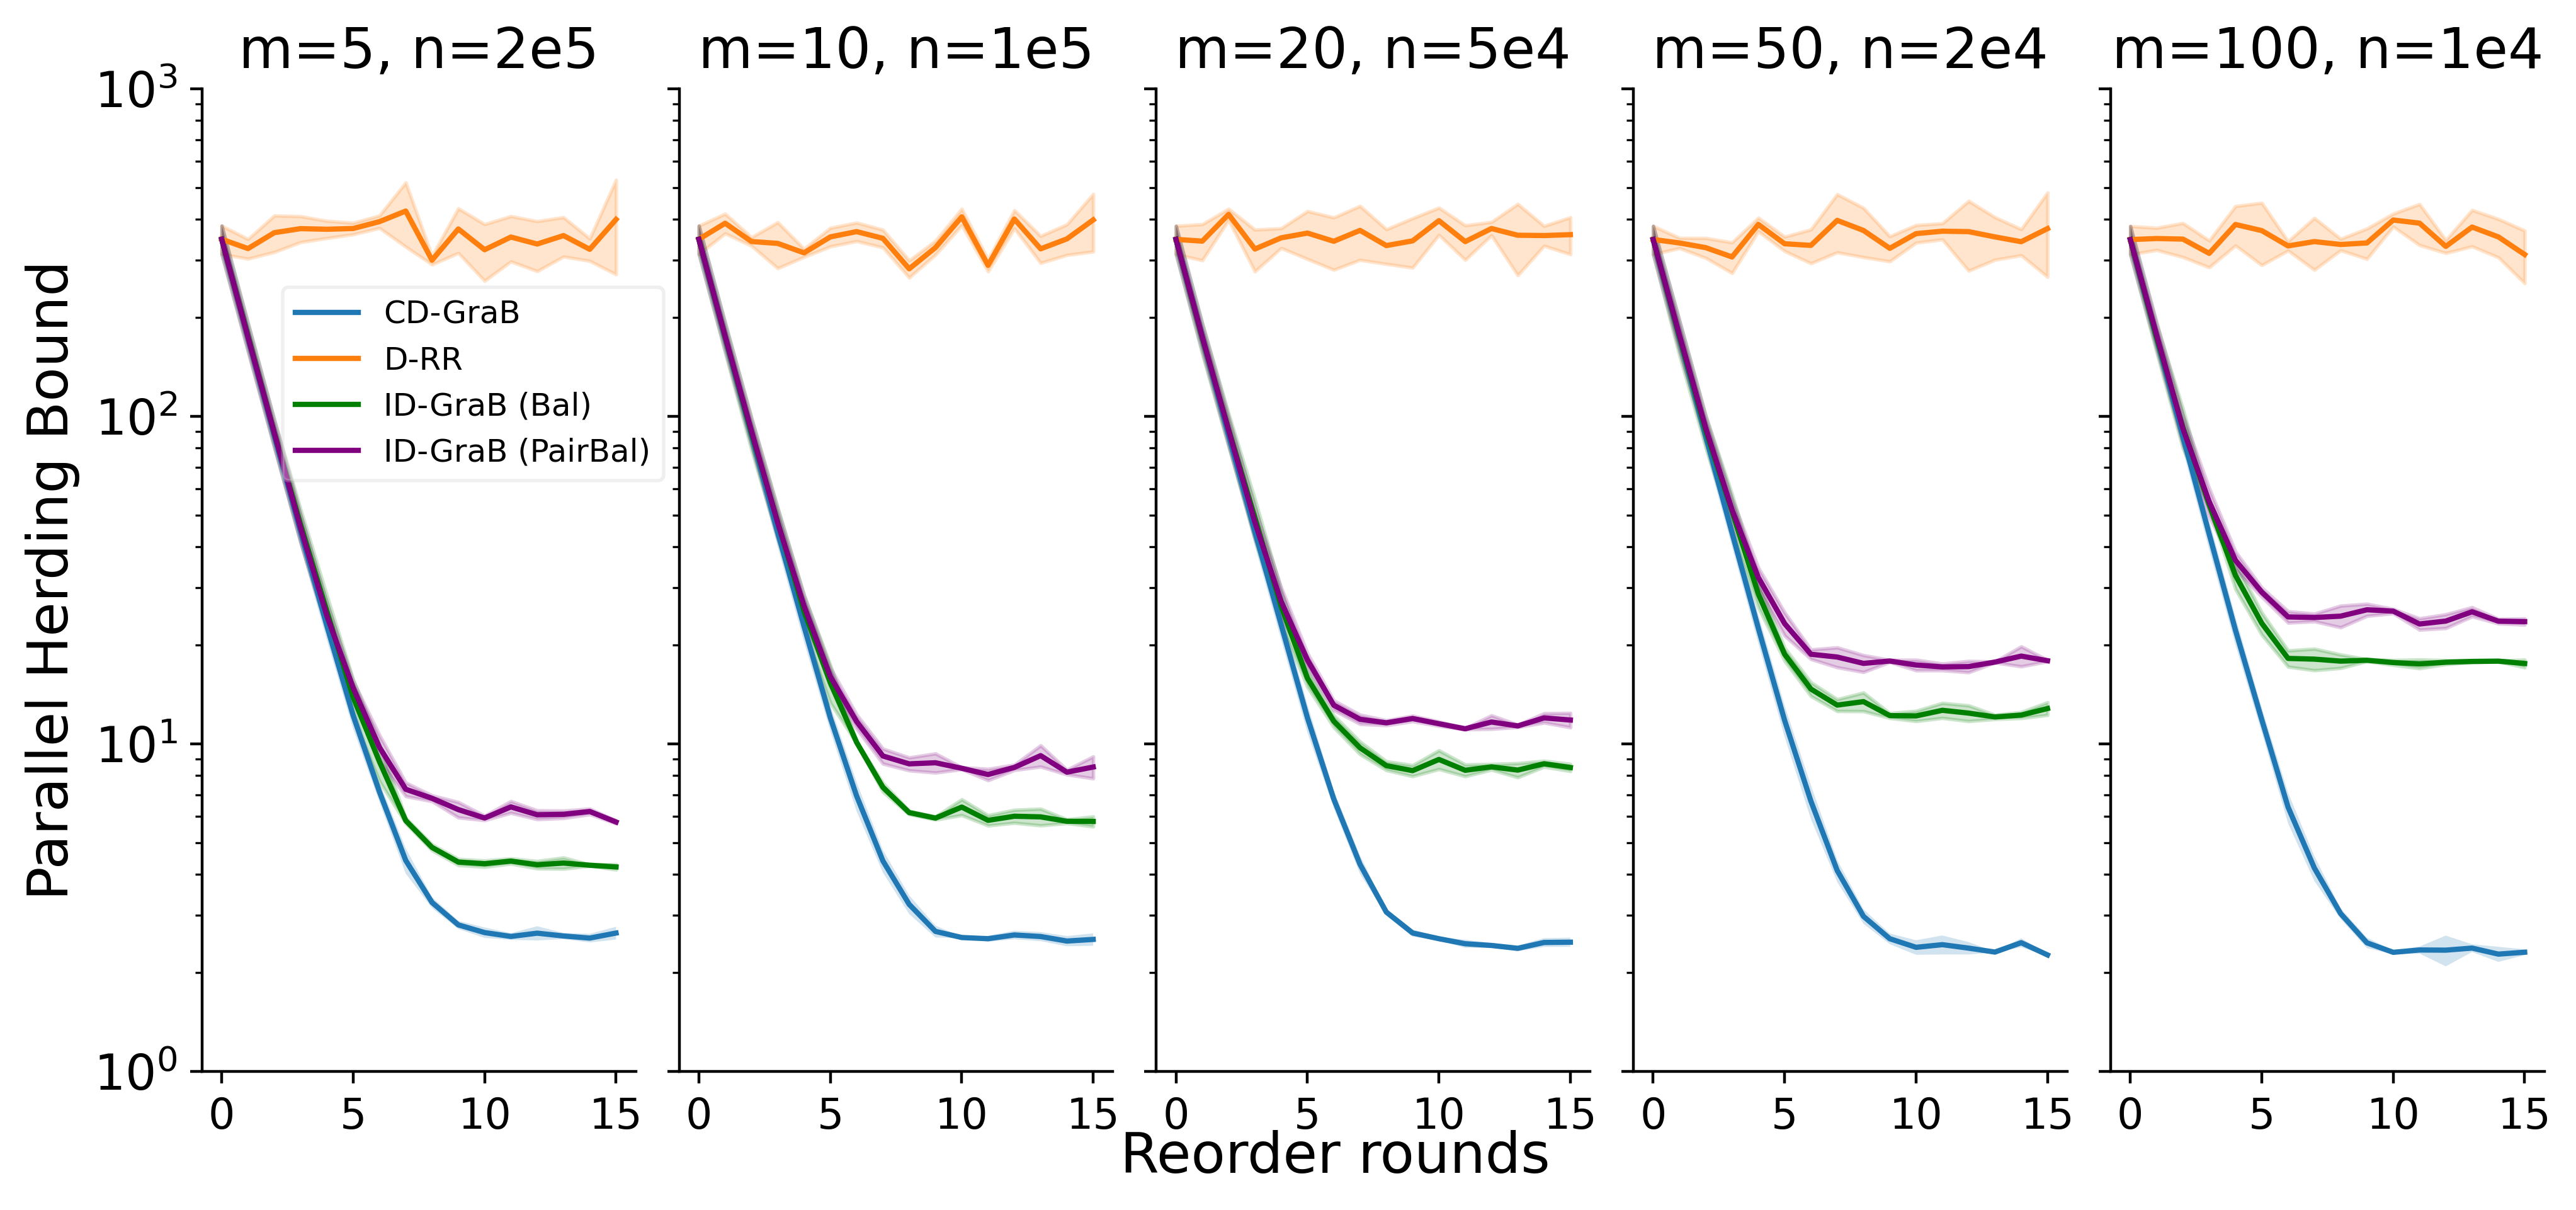

In [82]:
ms = [int(2e5), int(1e5), int(5e4), int(2e4), int(1e4)]
ns = [5, 10, 20, 50, 100]
ms_to_show = ['2e5', '1e5', '5e4', '2e4', '1e4']

d = 16

fig, axes = plt.subplots(ncols=5, nrows=1, figsize=(12, 5), dpi=400, gridspec_kw=dict(wspace=0.1, hspace=0.1, bottom=0.1), sharex=True, sharey=True)

for i in range(5):
    m, n = ms[i], ns[i]
    independent_herding_values = load_pickle_file('independent-balance', m, n, d)
    order_server_herding_values = load_pickle_file('online-pb', m, n, d)
    independent_pair_balance_herding_values = load_pickle_file('independent-pb', m, n, d)
    random_herding_values = load_pickle_file('random', m, n, d)

    plot(order_server_herding_values, 'CD-GraB', axes[i])
    plot(random_herding_values, 'D-RR', axes[i],  color='#ff7f0e')
    plot(independent_herding_values, 'ID-GraB (Bal)', axes[i], color='green')
    plot(independent_pair_balance_herding_values, 'ID-GraB (PairBal)', axes[i],  color='purple')

    axes[i].set_title(f"m={n}, n={ms_to_show[i]}", fontsize=16)
    axes[i].spines[['right', 'top']].set_visible(False)
    axes[i].set_xticklabels(['-1', '0', '5', '10', '15'], fontsize=12)

axes[0].set_ylim(1, 1000)
axes[0].set_yticklabels(['1e0', '1e1', '1e2', '1e3'], fontsize=14)
axes[0].set_yscale('log')
axes[0].set_ylabel("Parallel Herding Bound", fontsize=16)
axes[0].legend(fontsize=9, loc='right', framealpha=0.3, bbox_to_anchor=(1.1, 0.7))
fig.supxlabel('Reorder rounds', fontsize=16)
fig.savefig(f'..{os.sep}..{os.sep}graph{os.sep}random_simulation{os.sep}random_simulation_complete.png')
fig.savefig(f'..{os.sep}..{os.sep}graph{os.sep}random_simulation{os.sep}random_simulation_complete.pdf',
            format="pdf", bbox_inches="tight")


/tmp/ipykernel_3184874/1047708800.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(['-1', '0', '5', '10', '15'], fontsize=12)
/tmp/ipykernel_3184874/1047708800.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_yticklabels(['1e0', '1e1', '1e2', '1e3'], fontsize=14)


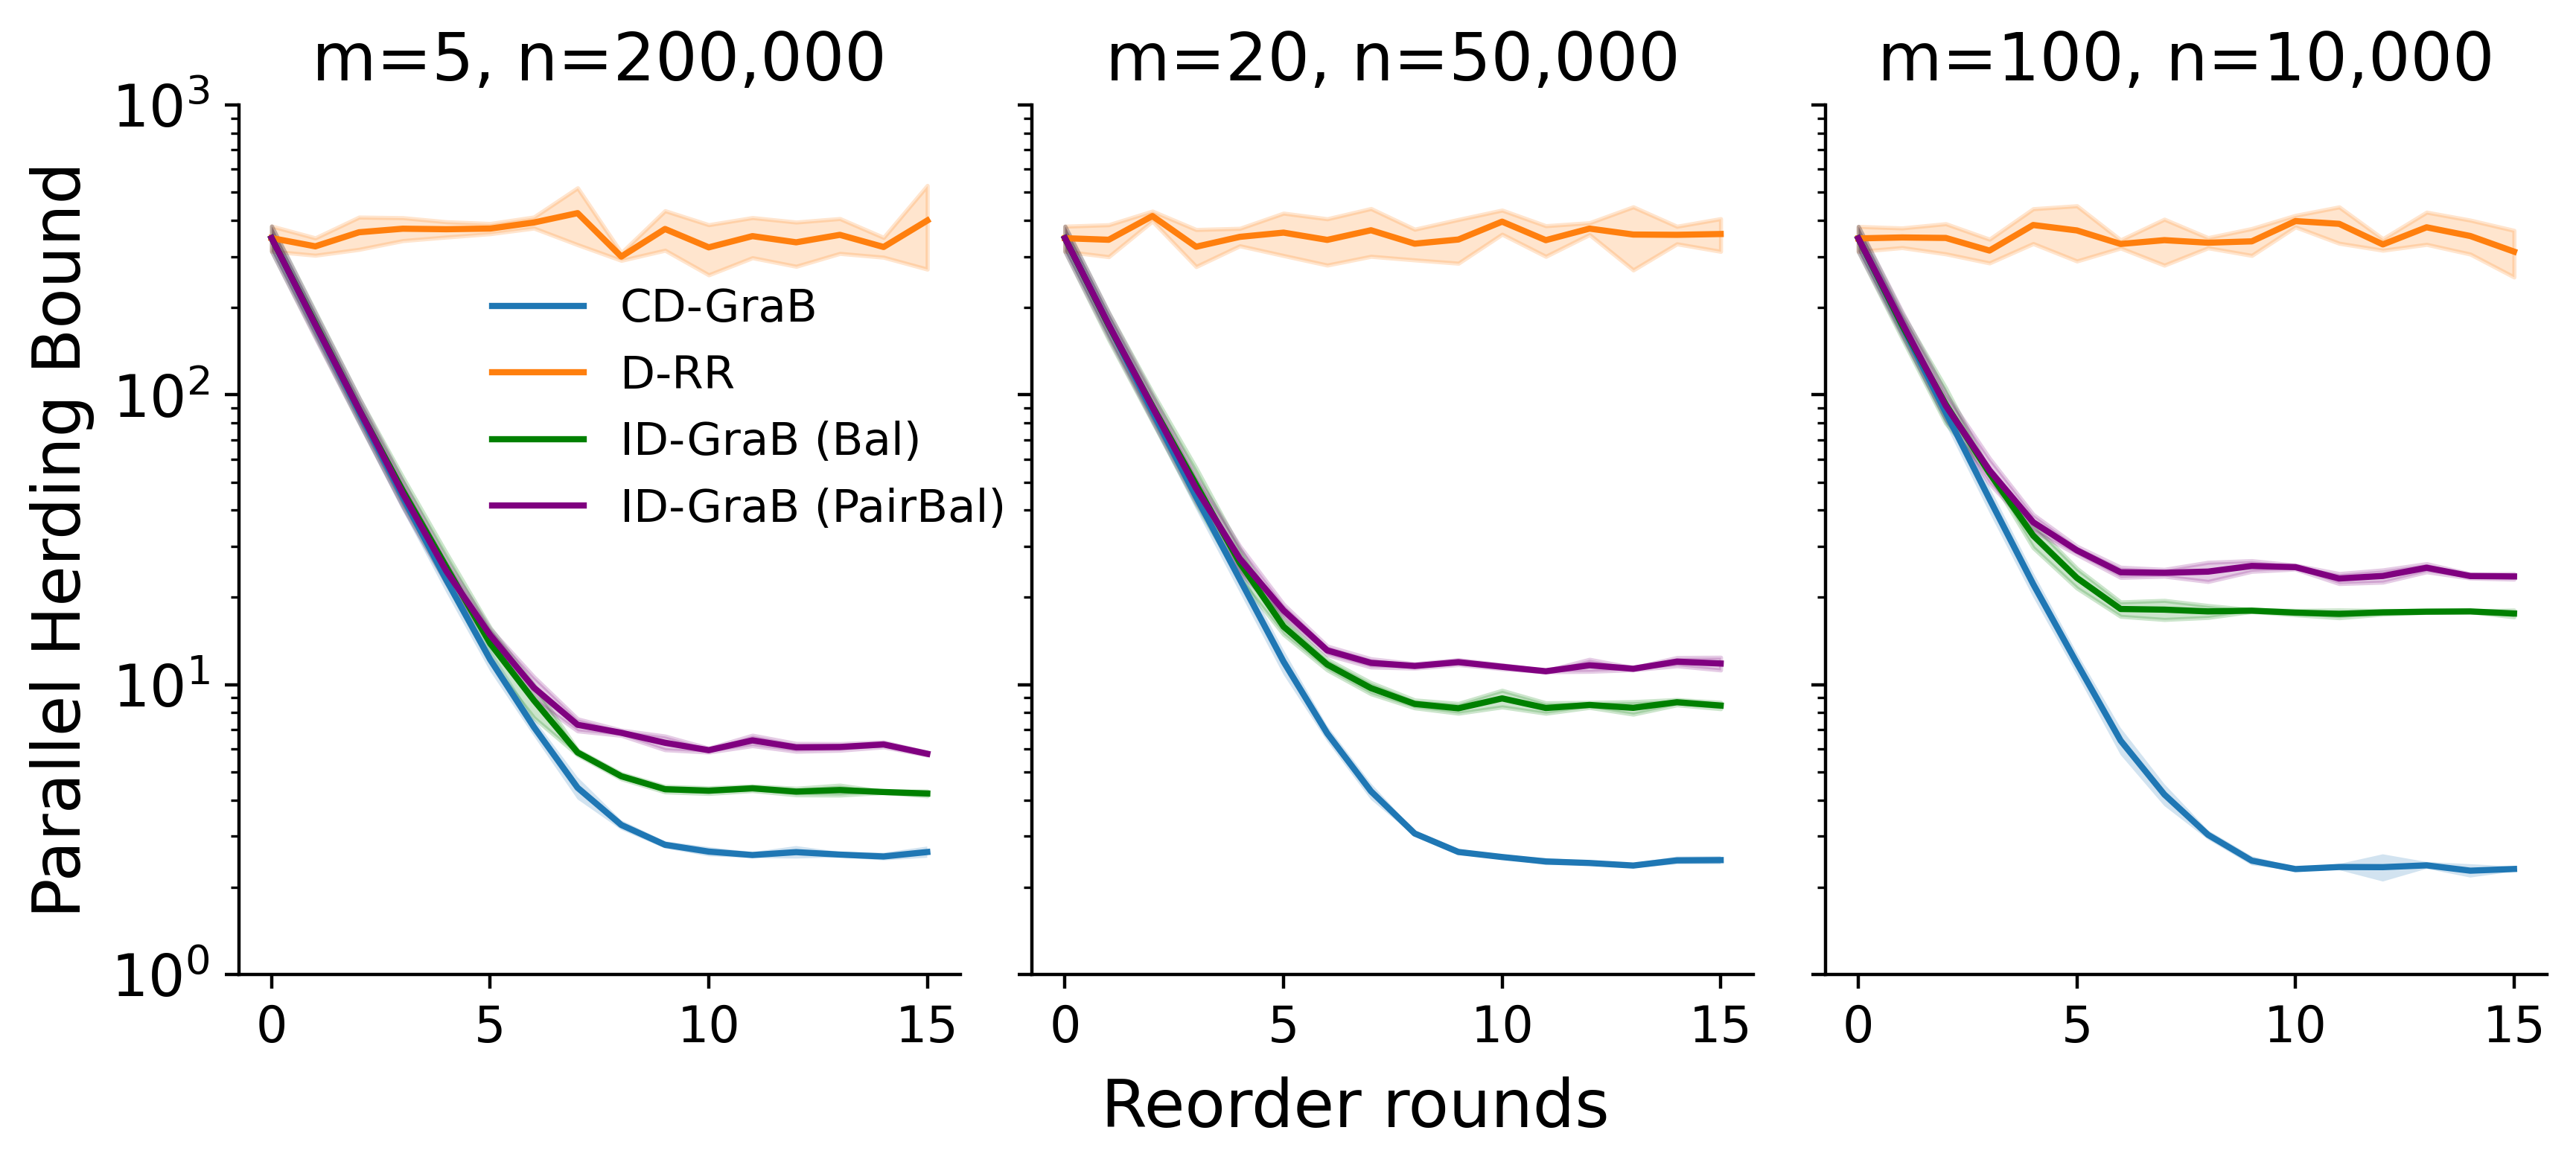

In [19]:
ms = [int(2e5), int(5e4), int(1e4)]
ns = [5, 20, 100]
ms_to_show = ['200,000', '50,000', '10,000']

d = 16

fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(10, 4), dpi=400, gridspec_kw=dict(
    wspace=0.1, hspace=0.1, bottom=0.15), sharex=True, sharey=True)

for i in range(3):
    m, n = ms[i], ns[i]
    independent_herding_values = load_pickle_file(
        'independent-balance', m, n, d)
    order_server_herding_values = load_pickle_file('online-pb', m, n, d)
    independent_pair_balance_herding_values = load_pickle_file(
        'independent-pb', m, n, d)
    random_herding_values = load_pickle_file('random', m, n, d)

    plot(order_server_herding_values, 'CD-GraB', axes[i])
    plot(random_herding_values, 'D-RR', axes[i],  color='#ff7f0e')
    plot(independent_herding_values, 'ID-GraB (Bal)', axes[i], color='green')
    plot(independent_pair_balance_herding_values,
         'ID-GraB (PairBal)', axes[i],  color='purple')

    axes[i].set_title(f"m={n}, n={ms_to_show[i]}", fontsize=16)
    axes[i].spines[['right', 'top']].set_visible(False)
    axes[i].set_xticklabels(['-1', '0', '5', '10', '15'], fontsize=12)

axes[0].set_ylim(1, 1000)
axes[0].set_yticklabels(['1e0', '1e1', '1e2', '1e3'], fontsize=14)
axes[0].set_yscale('log')
axes[0].set_ylabel("Parallel Herding Bound", fontsize=16)
axes[0].legend(fontsize=11, loc='right', framealpha=0,
               bbox_to_anchor=(1.12, 0.65))
fig.supxlabel('Reorder rounds', fontsize=16)
fig.savefig(
    f'..{os.sep}..{os.sep}graph{os.sep}random_simulation{os.sep}random_simulation-poster.png')

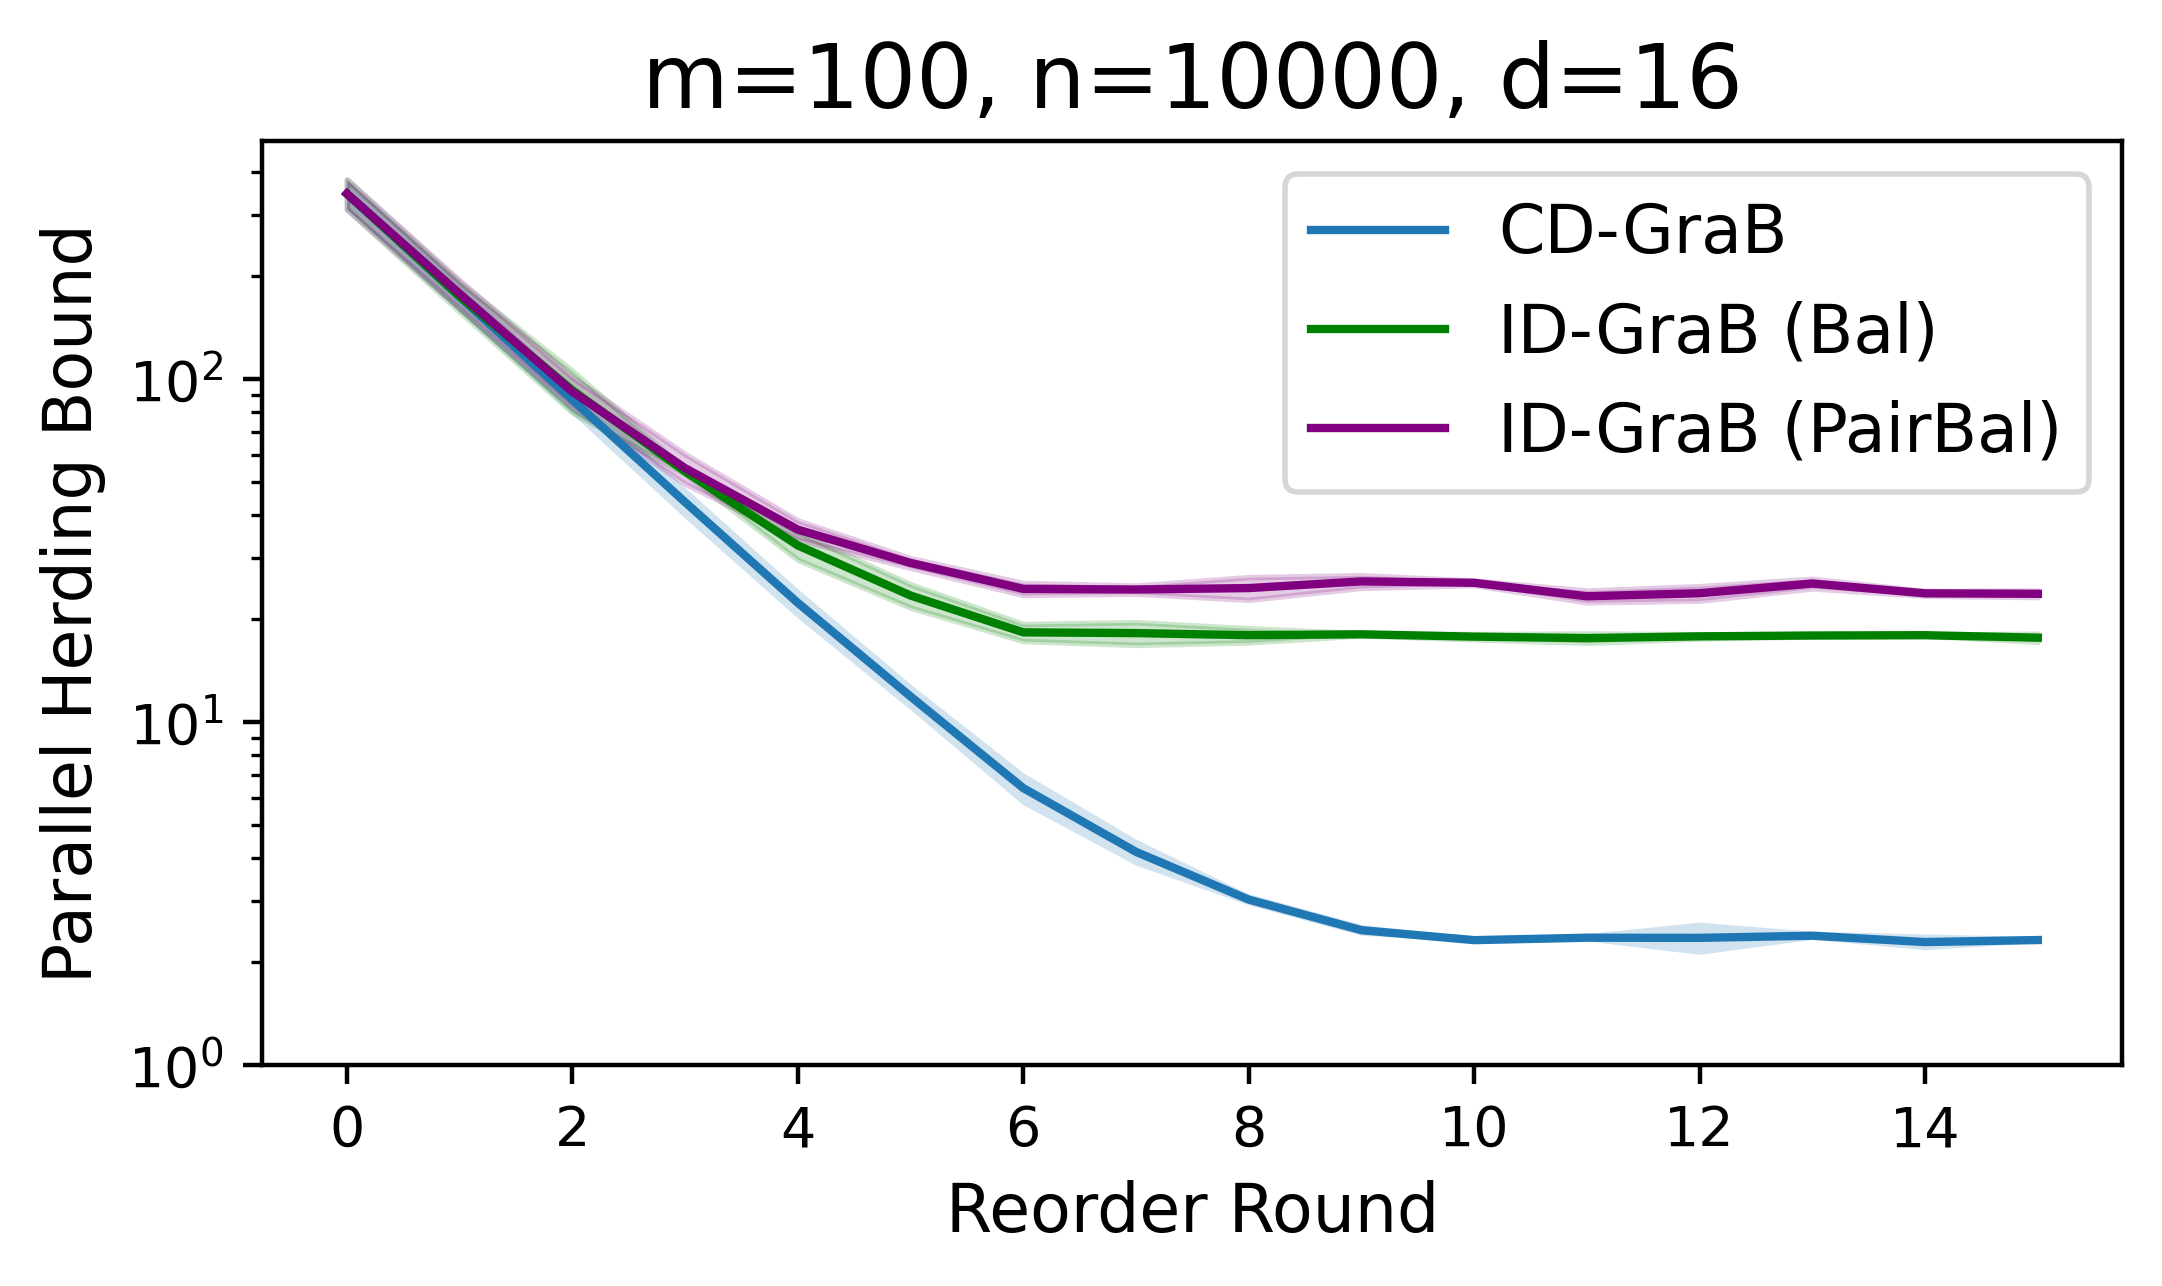

In [31]:
# m, n, d = 10000, 100, 16

# vanilla_herding_values = load_pickle_file('centralized-balance', m, n, d)
# independent_herding_values = load_pickle_file('independent-balance', m, n, d)
# order_server_herding_values = load_pickle_file('online-pb', m, n, d)
# independent_pair_balance_herding_values = load_pickle_file('independent-pb', m, n, d)
# centralized_pair_balance_herding_values = load_pickle_file('centralized-pb', m, n, d)

# d_rr_values = torch.as_tensor(order_server_herding_values)[:, 0].mean(dim=0)
# d_rr_std = torch.as_tensor(order_server_herding_values)[:, 0].std(dim=0)

# plt.figure(figsize=(6, 3), dpi=400)
# plot(order_server_herding_values, 'CD-GraB')
# # plot(order_server_herding_values, 'CD-GraB', color='orange')
# # plt.axhline(d_rr_values, 0, 15, label='D-RR', color='orange')
# # plt.fill_between(np.arange(0, 16), (d_rr_values - d_rr_std),
# #                  (d_rr_values + d_rr_std), alpha=0.1, color='orange')
# plot(independent_herding_values, 'ID-GraB (Bal)', color='green')
# plot(independent_pair_balance_herding_values, 'ID-GraB (PairBal)', color='purple')
# # plot(vanilla_herding_values, 'C-B')
# # plot(centralized_pair_balance_herding_values, 'C-PB')

# plt.yscale('log')
# plt.xlabel("Reorder Round", fontsize=12)
# plt.ylabel("Parallel Herding Bound", fontsize=12)
# plt.legend(fontsize=12)
# plt.title(f"m={n}, n={m}, d={d}", fontsize=16) # not a mistake. just a change in notation
# plt.yticks([1.0, 10.0, 100.0])
# plt.savefig(f'..{os.sep}..{os.sep}graph{os.sep}random_simulation{os.sep}m-{n}-n-{m}-d-{d}-decentralized.png')
# plt.savefig(f'..{os.sep}..{os.sep}graph{os.sep}random_simulation{os.sep}m-{n}-n-{m}-d-{d}-decentralized.pdf', format="pdf", bbox_inches="tight")


In [20]:
def reorder_from_signs(signs, single_vecs):
    next_vecs = np.empty_like(single_vecs)

    pos_half = np.where(signs == +1)
    pos_half_size = len(pos_half[0])
    next_vecs[:pos_half_size] = single_vecs[pos_half]

    neg_half = np.where(signs == -1)
    neg_half_size = len(neg_half[0])
    next_vecs[pos_half_size:] = single_vecs[neg_half][::-1]

    assert pos_half_size + neg_half_size == len(single_vecs)

    return next_vecs

def vanilla_balance(single_vecs):
    # single_vecs: mn, d
    run_sum = np.zeros_like(single_vecs[0])
    signs = np.zeros((len(single_vecs),), dtype=np.int8)
    for i, vec in enumerate(single_vecs):
        if np.linalg.norm(run_sum + vec, ord=2) <= np.linalg.norm(run_sum - vec, ord=2):
            signs[i] = +1
            run_sum += vec
        else:
            signs[i] = -1
            run_sum -= vec
    return signs

def parallel_herding_bound(vecs):
    # vecs: m, n, d
    return np.maximum.accumulate(np.linalg.norm(np.cumsum(np.sum(vecs, axis=1), axis=0), ord=float('inf'), axis=1))[-1]

def independent_parallel_reorder_multiround(vecs, round):
    herding_bounds = []
    # vecs: m, n, d
    herding_bounds.append(parallel_herding_bound(vecs))  # zero round
    for _ in range(round):
        next_epoch_vecs = np.empty_like(vecs)
        for i in range(n):
            signs = vanilla_balance(vecs[:, i, :])
            next_epoch_vecs[:, i, :] = reorder_from_signs(signs, vecs[:, i, :])
        vecs = next_epoch_vecs
        herding_bounds.append(parallel_herding_bound(vecs))
    return herding_bounds


In [16]:
m = 100
n = 100
d = 16
mn = m * n
vecs = np.random.RandomState(0).randn(mn, 16)
vecs = vecs / np.linalg.norm(vecs, ord=2, axis=1).reshape(mn, 1)
vecs = vecs.reshape(m, n, d)
vecs -= np.expand_dims(vecs.mean(axis=0), 0)
res = []

In [22]:
independent_parallel_reorder_multiround(vecs, 10)

[38.12667262741408,
 24.572691695425917,
 16.103769597642486,
 13.570759338621514,
 15.073761450355109,
 13.185696179917711,
 13.185696179917711,
 13.185696179917711,
 13.185696179917711,
 13.185696179917711,
 13.185696179917711]

In [9]:
def herding_bound(vecs):
    return np.maximum.accumulate(np.linalg.norm(np.cumsum(vecs, 0), ord=float('inf'), axis=1))[-1]

def vanilla_balance(single_vecs):
    # single_vecs: mn, d
    run_sum = np.zeros_like(single_vecs[0])
    signs = np.zeros((len(single_vecs),), dtype=np.int8)
    for i, vec in enumerate(single_vecs):
        if np.linalg.norm(run_sum + vec, ord=2) <= np.linalg.norm(run_sum - vec, ord=2):
            signs[i] = +1
            run_sum += vec
        else:
            signs[i] = -1
            run_sum -= vec
    return signs

def vanilla_reorder_multiround(single_vecs, round):
    herding_bounds = []
    # single_vecs: mn, d
    herding_bounds.append(herding_bound(single_vecs))  
    for _ in range(round):
        signs = vanilla_balance(single_vecs)
        single_vecs = reorder_from_signs(signs, single_vecs)
        herding_bounds.append(herding_bound(single_vecs))
    return herding_bounds


In [23]:
vanilla_reorder_multiround(vecs.reshape(mn, d), 15)


[39.680591280253076,
 20.383956865831284,
 10.812807567102073,
 5.9319714993807,
 3.3746183380352845,
 2.394920968233162,
 1.938465662286448,
 1.5407014067489373,
 1.6737908927056118,
 1.6737908927056118,
 1.6737908927056118,
 1.6737908927056118,
 1.6737908927056118,
 1.6737908927056118,
 1.6737908927056118,
 1.6737908927056118]

In [18]:
herding_bound(vecs.reshape(mn, d))

39.680591280253076

In [17]:
parallel_herding_bound(vecs)

38.12667262741408

In [14]:
def parallel_pair_balance_and_reorder(vecs):
    # vecs: m, n, d
    m, n, d = vecs.shape
    mn = m * n
    run_sum = np.zeros((d,))

    next_epoch_vecs = np.empty_like(vecs)
    left, right = 0, m - 1

    for i in range(0, m, 2):
        pair_diff = vecs[i, :, :] - vecs[i + 1, :, :]  # n, d
        for j in range(n):
            if np.linalg.norm(run_sum + pair_diff[j], ord=2) <= np.linalg.norm(run_sum - pair_diff[j], ord=2):
                next_epoch_vecs[left, j] = vecs[i, j]  # +1
                next_epoch_vecs[right, j] = vecs[i + 1, j]  # -1
                run_sum += pair_diff[j]
            else:
                next_epoch_vecs[right, j] = vecs[i, j]  # -1
                next_epoch_vecs[left, j] = vecs[i + 1, j]  # +1
                run_sum -= pair_diff[j]
        left += 1
        right -= 1

    return next_epoch_vecs


def parallel_pair_balance_reorder_multiround(vecs, round):
    herding_bounds = []
    # vecs: m, n, d
    herding_bounds.append(parallel_herding_bound(vecs))
    for _ in range(round):
        vecs = parallel_pair_balance_and_reorder(vecs)
        herding_bounds.append(parallel_herding_bound(vecs))
    return herding_bounds


In [15]:
parallel_pair_balance_reorder_multiround(vecs, 15)


[13.185696179917711,
 7.271048969052989,
 3.6521094519777524,
 2.4402155058296526,
 2.2158099621456953,
 1.915122997860538,
 2.175286589009389,
 1.8965222467661453,
 2.2429206934054067,
 1.5884791604858608,
 1.8232812773567473,
 1.6893640682436277,
 2.0035697296570376,
 1.9059989415516916,
 1.695156510233694,
 1.8216336686172936]